Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/WeatherData.csv')

1. Data Overview and Cleaning:
*   What are the key characteristics of the dataset? (e.g., number of records, features, data types)
*   Identify and handle any missing or null values. Describe your approach and reasoning.   
*  Check for and address any duplicate records.
2. Statistical Summary:
*  Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
*  Identify and describe any significant outliers in the data.
3. Data Visualization:
*   Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
*   Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
*   Create correlation matrices and heatmaps to identify relationships between different weather parameters.
4. Weather Patterns and Trends:
*  Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
*  Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?
5. Insights and Conclusions:
*  Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
*  How can these insights be useful for weather prediction or other practical applications?
6. Recommendations for Further Analysis:
* Suggest areas for further analysis or additional data that might be useful to explore.

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.shape

(8784, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
df.describe(include='all')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [7]:
df.value_counts()

,,,,,,,,count
Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,
1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1
6/1/2012 12:00,19.3,3.3,35,20,48.3,101.32,Cloudy,1
5/9/2012 7:00,14.3,12.5,89,15,4.8,100.12,Fog,1
5/9/2012 8:00,14.3,12.3,88,17,6.4,100.12,Fog,1
5/9/2012 9:00,14.0,12.3,89,9,4.0,100.10,"Drizzle,Fog",1
...,...,...,...,...,...,...,...,...
12/8/2012 3:00,2.1,-1.5,77,6,25.0,101.18,Cloudy,1
12/8/2012 2:00,2.0,-1.9,75,7,25.0,101.17,Cloudy,1
12/8/2012 23:00,1.3,0.6,95,17,8.0,100.96,"Drizzle,Fog",1


In [8]:
df.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


In [9]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [10]:
df.nunique()

,0
Date/Time,8784
Temp_C,533
Dew Point Temp_C,489
Rel Hum_%,83
Wind Speed_km/h,34
Visibility_km,24
Press_kPa,518
Weather,50


In [11]:
df.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


I've checked the sum of null values in each column in the above line of code and found no null values.







In [12]:
df.duplicated().sum()

0

In [13]:
df.describe(include=[int, float])

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Text(0, 0.5, 'Frequency')

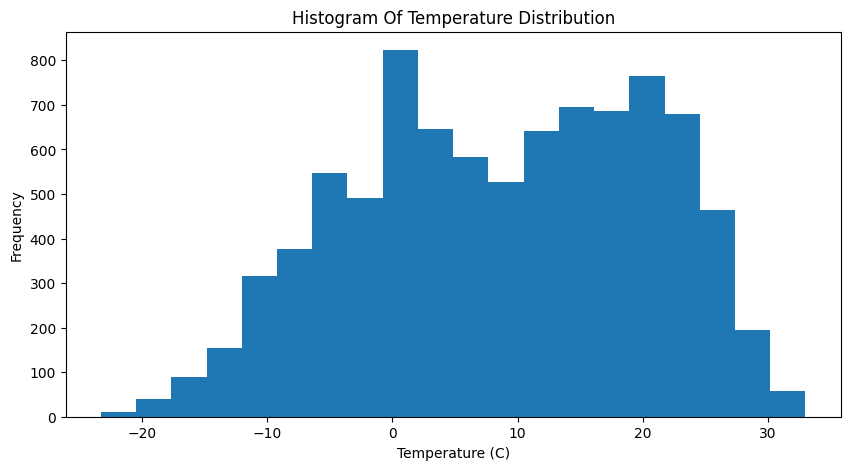

In [14]:
df['Temp_C'].plot.hist(bins=20, figsize=(10, 5))
plt.title('Histogram Of Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

visualization of the Dew Point Temp_C

Text(0.5, 0, 'Temperature (C)')

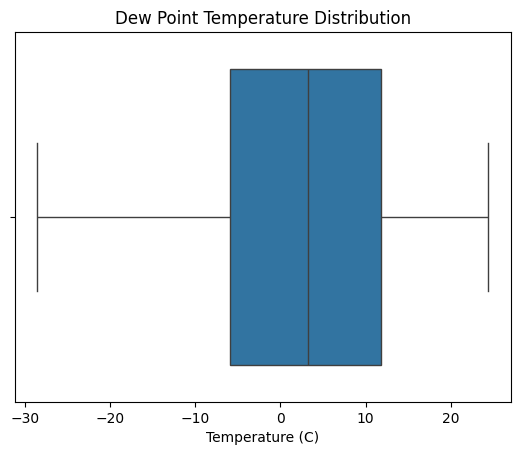

In [15]:
sns.boxplot(x=df['Dew Point Temp_C'])
plt.title('Dew Point Temperature Distribution')
plt.xlabel('Temperature (C)')
#

Text(0, 0.5, 'Temperature (C)')

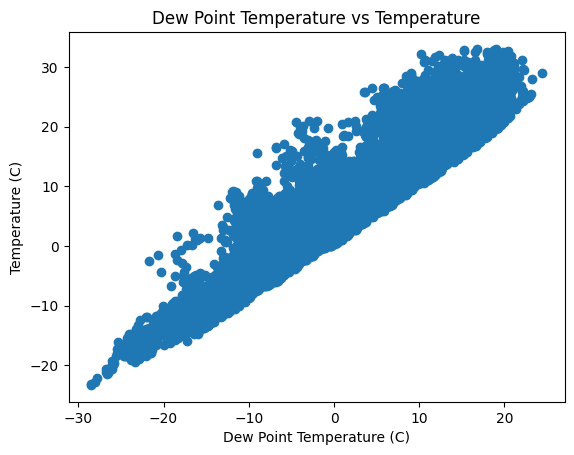

In [16]:
plt.scatter(x=df['Dew Point Temp_C'], y=df['Temp_C'])
plt.title('Dew Point Temperature vs Temperature')
plt.xlabel('Dew Point Temperature (C)')
plt.ylabel('Temperature (C)')


Identifying outliers using the interquartile range.

Creating  a new dataframe called df_numeric for the numeric columns which I used to find the IQR and then calculated the outliers


In [17]:
numeric_cols = ['Temp_C','Dew Point Temp_C', 'Rel Hum_%',	'Wind Speed_km/h',	'Visibility_km',	'Press_kPa']
numeric = df[numeric_cols]


In [18]:
print(numeric)

      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0       -1.8              -3.9         86                4            8.0   
1       -1.8              -3.7         87                4            8.0   
2       -1.8              -3.4         89                7            4.0   
3       -1.5              -3.2         88                6            4.0   
4       -1.5              -3.3         88                7            4.8   
...      ...               ...        ...              ...            ...   
8779     0.1              -2.7         81               30            9.7   
8780     0.2              -2.4         83               24            9.7   
8781    -0.5              -1.5         93               28            4.8   
8782    -0.2              -1.8         89               28            9.7   
8783     0.0              -2.1         86               30           11.3   

      Press_kPa  
0        101.24  
1        101.24  
2        101.26  
3  

In [19]:
Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1

In [20]:
print(IQR)

Temp_C              18.70
Dew Point Temp_C    17.70
Rel Hum_%           25.00
Wind Speed_km/h     11.00
Visibility_km        0.90
Press_kPa            1.03
dtype: float64


Detecting outliers in the dataframe

In [21]:
outliers = (numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))

Summation of outliers in each column

In [22]:
outliers.sum()

,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,2
Wind Speed_km/h,162
Visibility_km,3539
Press_kPa,207


Extract all rows that have ouliers

In [23]:
outliers_row = df[~outliers.any(axis=1)]
outliers_row

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8763,12/31/2012 3:00,-11.8,-14.4,81,6,25.0,101.42,Mostly Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy


In [24]:
outliers_row.shape

(5069, 8)

Summary statistics of outliers row

In [25]:
outliers_row.describe(include='all')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,5069,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069
unique,5069,NaN,NaN,NaN,NaN,NaN,NaN,15
top,1/1/2012 20:00,NaN,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1354
mean,NaN,8.570270,2.773289,68.256855,14.024857,24.670823,101.067147,NaN
std,NaN,11.671892,11.410334,13.319310,7.768692,0.433519,0.753289,NaN
min,NaN,-23.300000,-28.500000,21.000000,0.000000,24.100000,99.050000,NaN
25%,NaN,0.100000,-5.900000,59.000000,7.000000,24.100000,100.570000,NaN
50%,NaN,9.200000,4.100000,69.000000,13.000000,25.000000,101.060000,NaN
75%,NaN,18.500000,12.600000,78.000000,19.000000,25.000000,101.570000,NaN


Creating visualization of Humidity and speed using scatter plot

Text(0, 0.5, 'Rel Hum_%')

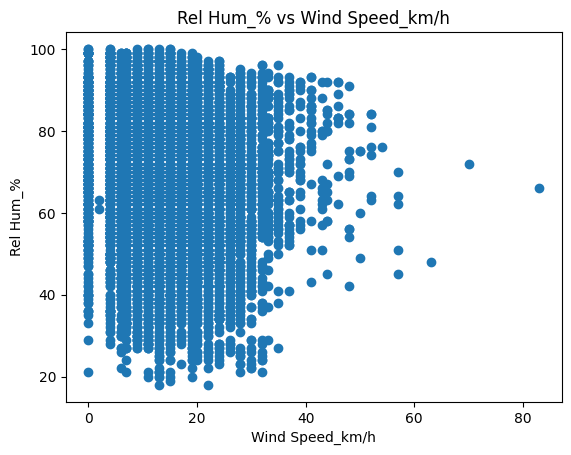

In [26]:
y = df["Rel Hum_%"]
x = df["Wind Speed_km/h"]
plt.scatter(x,y)
plt.title("Rel Hum_% vs Wind Speed_km/h")
plt.xlabel("Wind Speed_km/h")
plt.ylabel("Rel Hum_%")

Visualization of Temperature and Humidity using pairplot

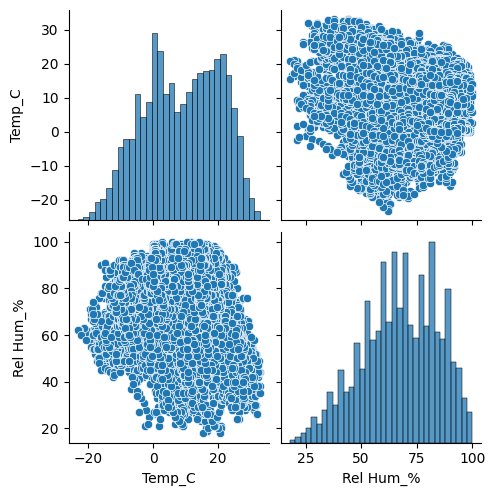

In [27]:
sns.pairplot(df[['Temp_C', 'Rel Hum_%']])

Histogram plot of Relative Humidity

Text(0, 0.5, 'Frequency')

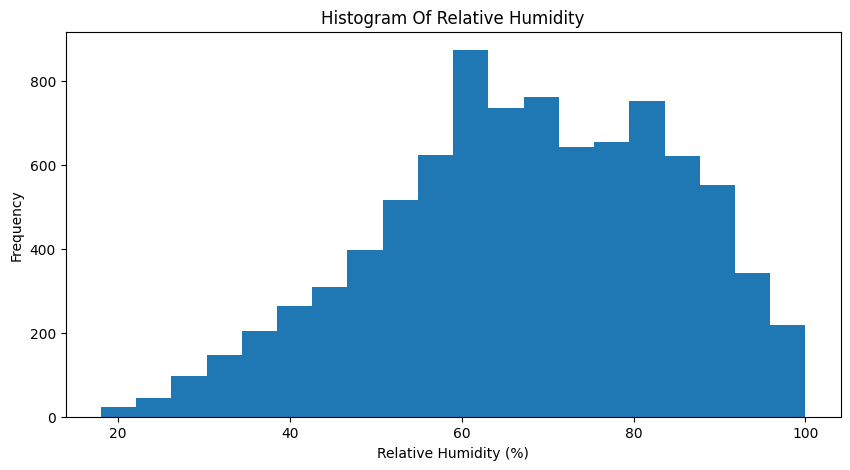

In [28]:
df['Rel Hum_%'].plot.hist(bins=20, figsize=(10, 5))
plt.title('Histogram Of Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')

Date/Time Column

In [29]:
df['Date/Time']

,Date/Time
0,1/1/2012 0:00
1,1/1/2012 1:00
2,1/1/2012 2:00
3,1/1/2012 3:00
4,1/1/2012 4:00
...,...
8779,12/31/2012 19:00
8780,12/31/2012 20:00
8781,12/31/2012 21:00
8782,12/31/2012 22:00


Converting Date/Time column to datetime

In [30]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [31]:
df['Date/Time']

,Date/Time
0,2012-01-01 00:00:00
1,2012-01-01 01:00:00
2,2012-01-01 02:00:00
3,2012-01-01 03:00:00
4,2012-01-01 04:00:00
...,...
8779,2012-12-31 19:00:00
8780,2012-12-31 20:00:00
8781,2012-12-31 21:00:00
8782,2012-12-31 22:00:00


Checking the datatype of the dataset

In [32]:
df.dtypes

,0
Date/Time,datetime64[ns]
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


Plotting Date/Time with Temperature



*   Temperature increase upto to the pic then decreases  steadly




Text(0, 0.5, 'Temperature (C)')

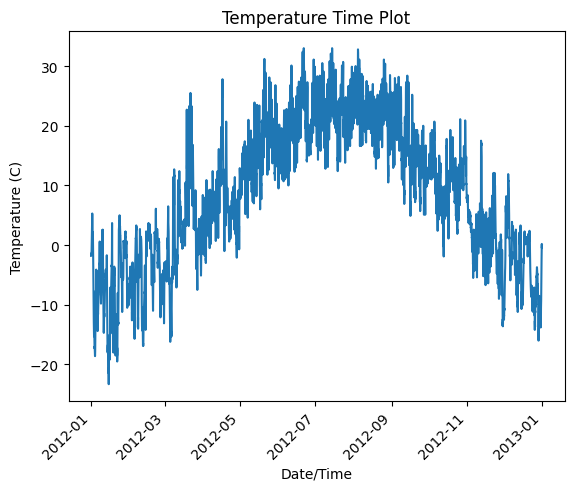

In [33]:
plt.plot(df['Date/Time'], df['Temp_C'])
plt.xticks(rotation=45, ha='right')
plt.title('Temperature Time Plot')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')


Date/Time plot with Visibility_km


Text(0, 0.5, 'Temperature (C)')

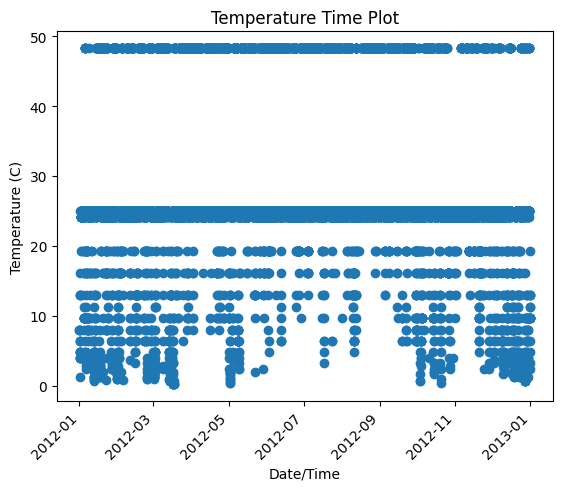

In [34]:
plt.scatter(x=df['Date/Time'], y=df['Visibility_km'])
plt.xticks(rotation=45, ha='right')
plt.title('Temperature Time Plot')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')

Checking the correlation of the numeric columns

In [35]:
correlation = numeric.corr()
correlation

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


Temperature and Dew point have a positive correlation

visualization of correlation using heatmap

<Axes: >

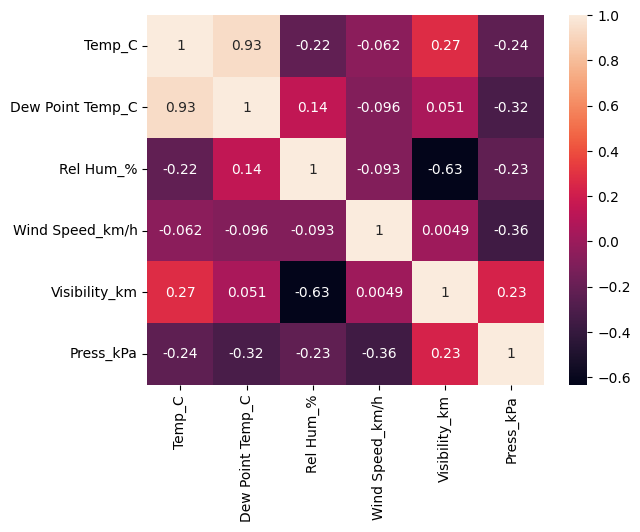

In [36]:
sns.heatmap(correlation, annot=True)

(0.0, 35.815)

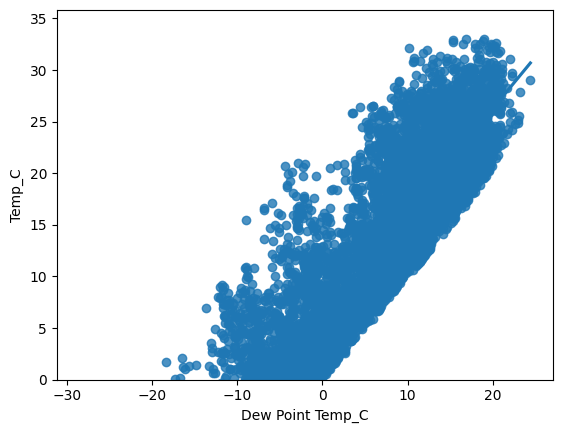

In [37]:
sns.regplot(x=df['Dew Point Temp_C'], y=df['Temp_C'])
plt.ylim(0,)

Group df by Weather and Date/Time and calculate mean of Wind Speed_km/h

In [38]:
speed = df.groupby(['Weather', 'Date/Time'])['Wind Speed_km/h'].mean().reset_index()
speed

,Weather,Date/Time,Wind Speed_km/h
0,Clear,2012-01-03 19:00:00,24.0
1,Clear,2012-01-05 18:00:00,11.0
2,Clear,2012-01-05 19:00:00,7.0
3,Clear,2012-01-05 20:00:00,9.0
4,Clear,2012-01-05 21:00:00,13.0
...,...,...,...
8779,"Thunderstorms,Rain Showers",2012-09-14 20:00:00,22.0
8780,"Thunderstorms,Rain Showers,Fog",2012-06-29 03:00:00,7.0
8781,"Thunderstorms,Rain Showers,Fog",2012-07-17 09:00:00,17.0
8782,"Thunderstorms,Rain Showers,Fog",2012-07-31 20:00:00,35.0


Histogram of Wind Speed

Text(0.5, 1.0, 'Wind Speed Mean Distribution')

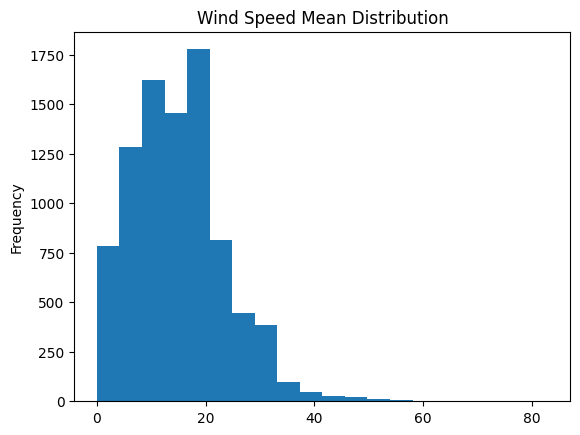

In [39]:
speed['Wind Speed_km/h'].plot.hist(bins=20)
plt.title('Wind Speed Mean Distribution')

In [40]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Extract month from the Date

In [41]:
month = df['Date/Time'].dt.month
month

,Date/Time
0,1
1,1
2,1
3,1
4,1
...,...
8779,12
8780,12
8781,12
8782,12


Add a new column called Month to the dataframe

In [42]:
df['Month'] = month

In [43]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1


Group data by Month and calculate the mean of Temp_C column and reset index

In [44]:
month_temp_mean = df.groupby('Month')['Temp_C'].mean().reset_index()
month_temp_mean

,Month,Temp_C
0,1,-7.371505
1,2,-4.225000
2,3,3.121237
3,4,7.009306
4,5,16.237769
5,6,20.134028
6,7,22.790054
7,8,22.279301
8,9,16.484444
9,10,10.954973


Bar plot of Month and Temperature that we calculated the mean above.

Text(0, 0.5, 'Average Temperature (C)')

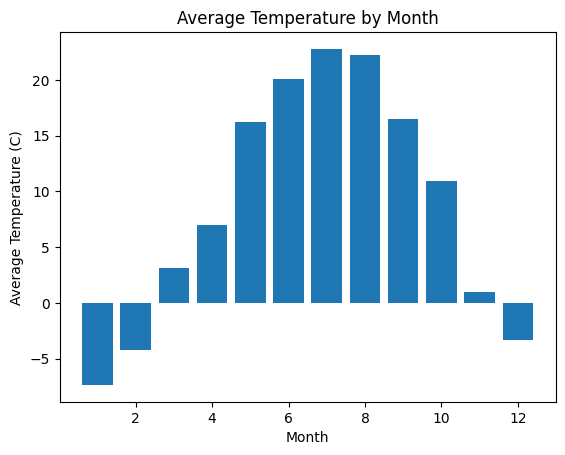

In [45]:
plt.bar(month_temp_mean['Month'], month_temp_mean['Temp_C'])
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')

Group df by Month and calculate the mean of Rel Hum_%

In [46]:
month_hum_mean = df.groupby('Month')['Rel Hum_%'].mean().reset_index()
month_hum_mean.head()

,Month,Rel Hum_%
0,1,68.383065
1,2,68.956897
2,3,64.862903
3,4,56.150000
4,5,61.760753


Scatter plot

Visualizing the distribution of Average Humidity by month

Text(0, 0.5, 'Average Humidity (%)')

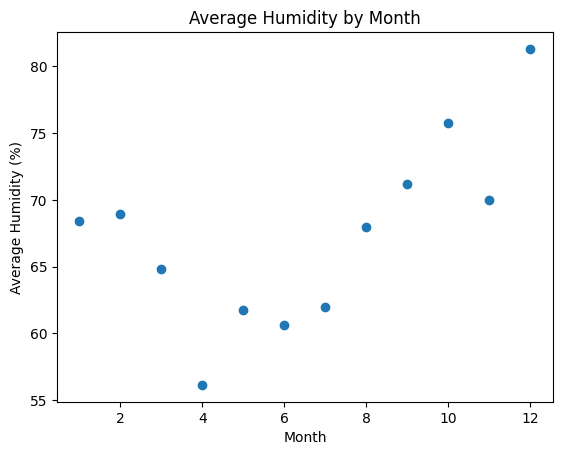

In [47]:
plt.scatter(month_hum_mean['Month'], month_hum_mean['Rel Hum_%'])
plt.title('Average Humidity by Month')
plt.xlabel('Month')
plt.ylabel('Average Humidity (%)')

Group df by Month and calculate the mean of Rel Humidity and Temp

In [48]:
month_mean = df.groupby('Month')[['Rel Hum_%', 'Temp_C']].mean().reset_index()
month_mean.head()

,Month,Rel Hum_%,Temp_C
0,1,68.383065,-7.371505
1,2,68.956897,-4.225000
2,3,64.862903,3.121237
3,4,56.150000,7.009306
4,5,61.760753,16.237769


Visualization distribution of Rel Hum and Temp

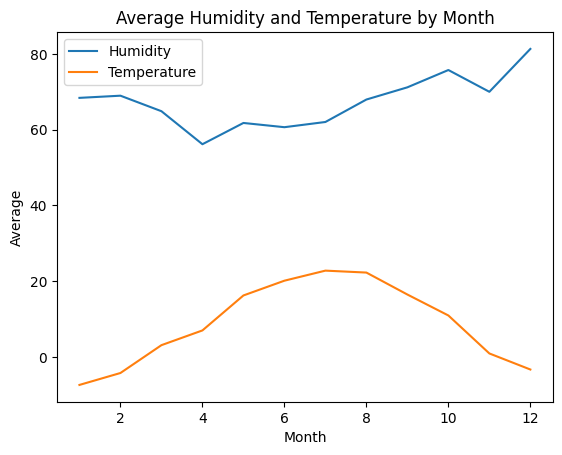

In [49]:
plt.plot(month_mean['Month'], month_mean['Rel Hum_%'], label='Humidity')
plt.plot(month_mean['Month'], month_mean['Temp_C'], label='Temperature')
plt.title('Average Humidity and Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average')
plt.legend()

The visualization above explains that Average Humidity distribution decreases slightly as month increase and then increases with increase in month.

Average Temperature Increases slightly with increase in month and then decreases with increase in month

Visualization distribution of Months

Text(0.5, 1.0, 'Counts Of Months')

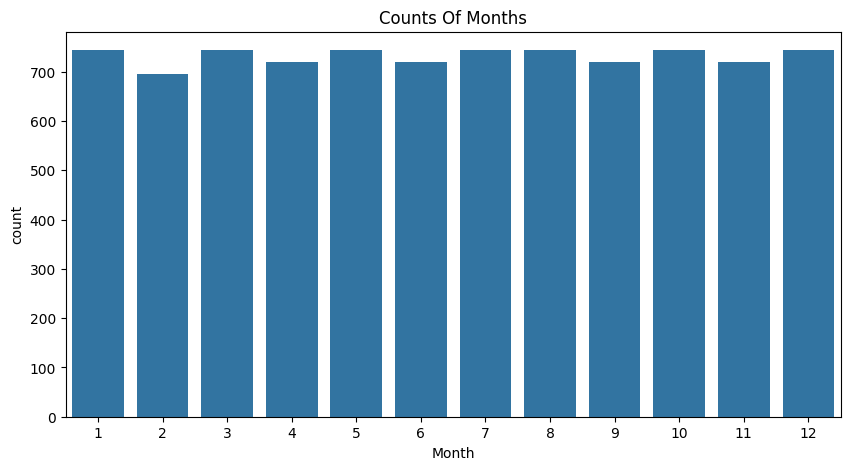

In [50]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df['Month'], data=df)
plt.title('Counts Of Months')


Text(0, 0.5, 'Average Temperature (C)')

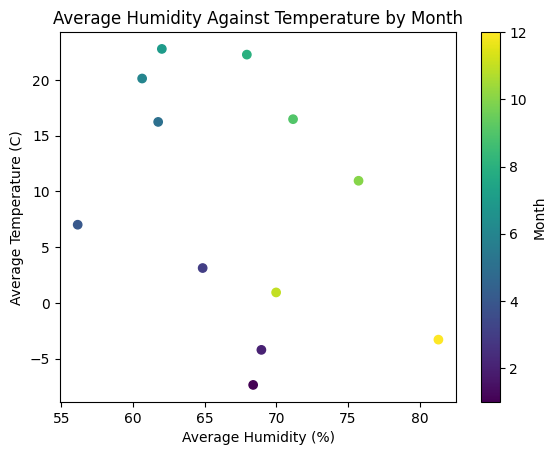

In [51]:
plt.scatter(month_mean['Rel Hum_%'], month_mean['Temp_C'], c=month_mean['Month'])
plt.colorbar(label='Month')
plt.title('Average Humidity Against Temperature by Month')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Average Temperature (C)')

The visualization above explains that from the first month to the 5th month the distribution of temp and humidity is more that the other months



In [52]:
df['Date/Time']

,Date/Time
0,2012-01-01 00:00:00
1,2012-01-01 01:00:00
2,2012-01-01 02:00:00
3,2012-01-01 03:00:00
4,2012-01-01 04:00:00
...,...
8779,2012-12-31 19:00:00
8780,2012-12-31 20:00:00
8781,2012-12-31 21:00:00
8782,2012-12-31 22:00:00


Detecting anomalies from the da

In [53]:
anomalies_timestamp = [
    '2012-01-08 11:00:00',
    '2012-01-22 10:00:00',
]

In [54]:
anomalies_timestamp

['2012-01-08 11:00:00', '2012-01-22 10:00:00']

In [55]:
df['timestamp'] = pd.to_datetime(df['Date/Time'])
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month,timestamp
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,2012-01-01 00:00:00
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,2012-01-01 01:00:00
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,2012-01-01 02:00:00
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,2012-01-01 03:00:00
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,2012-01-01 04:00:00


In [56]:
df['is_anomaly'] = 1
for each in anomalies_timestamp:
    df.loc[df['timestamp'] == each, 'is_anomaly'] = -1
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month,timestamp,is_anomaly
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,2012-01-01 00:00:00,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,2012-01-01 01:00:00,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,2012-01-01 02:00:00,1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,2012-01-01 03:00:00,1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,2012-01-01 04:00:00,1


Creating a dataframe to keep the anomalies and the inliers.

In [57]:
anomaly_df = df[df['is_anomaly'] == -1]
inlier_df = df[df['is_anomaly'] == 1]

Visualization of anomalies and inliers using a scatter plot

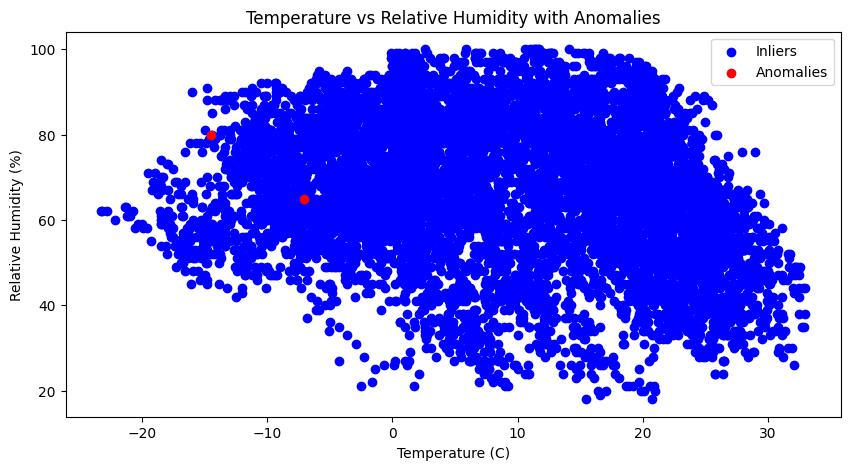

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(inlier_df['Temp_C'], inlier_df['Rel Hum_%'], color='blue', label='Inliers')
ax.scatter(anomaly_df['Temp_C'], anomaly_df['Rel Hum_%'], color='red', label='Anomalies')

ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Relative Humidity (%)')
ax.set_title('Temperature vs Relative Humidity with Anomalies')
ax.legend()

In [71]:
weather_vis = df.groupby('Weather')['Visibility_km'].value_counts().sort_values(ascending=False)
weather_vis

,,count
Weather,Visibility_km,
Mainly Clear,48.3,871
Clear,25.0,856
Mostly Cloudy,25.0,785
Mainly Clear,25.0,762
Cloudy,25.0,711
...,...,...
Freezing Drizzle,4.8,1
"Moderate Rain,Fog",6.4,1
"Drizzle,Fog",1.0,1


In [66]:
df.groupby('Weather')['Visibility_km'].value_counts().max()

871

The result of the visualization above shows that there are less anomalies and more data points are within the range i.e there are more inliers. Anomalies are less distributed they are only two data points.

**INSIGHTS GAINED**

*   The increase in temperature affects the dew point.
*   From january to july temperature starts increasing as we go to the next month then from august to december the temperature starts to decrease.

*   The visibility is high when the weather is Mainly Clear.






When we understand the visibility can be helpful in weather forecasting.
